In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_2ab793ee4b734b52922921116ad69df9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='p2EIE_PcF4ZLYWftCF-due2-4h29KGUExMa6JDxwrTeh',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_2ab793ee4b734b52922921116ad69df9.get_object(Bucket='diabetespredictionmellitus-donotdelete-pr-wlffcimt23p82j',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


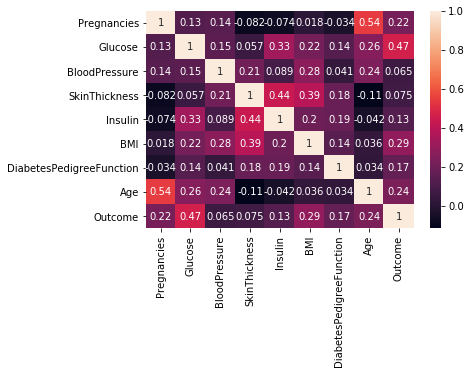

In [5]:
#to show the data as visualised data
import seaborn as sns
#it will show the heat map of the data set
#the darker spots have less impact and the lighter spots have more impact
sns.heatmap(dataset.corr(),annot=True)

In [6]:
dataset.shape

(768, 9)

In [7]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
#independent variables
x=dataset.iloc[:,0:8]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [10]:
#independent variables
x=dataset.iloc[:,0:8].values
x

array([[   6.   ,  148.   ,   72.   , ...,   33.6  ,    0.627,   50.   ],
       [   1.   ,   85.   ,   66.   , ...,   26.6  ,    0.351,   31.   ],
       [   8.   ,  183.   ,   64.   , ...,   23.3  ,    0.672,   32.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,   26.2  ,    0.245,   30.   ],
       [   1.   ,  126.   ,   60.   , ...,   30.1  ,    0.349,   47.   ],
       [   1.   ,   93.   ,   70.   , ...,   30.4  ,    0.315,   23.   ]])

In [11]:
#dependent variables
y=dataset.iloc[:,-1:].values
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [15]:
#separating test and training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
x_train

array([[   9.   ,   89.   ,   62.   , ...,   22.5  ,    0.142,   33.   ],
       [   1.   ,  118.   ,   58.   , ...,   33.3  ,    0.261,   23.   ],
       [   0.   ,   91.   ,   80.   , ...,   32.4  ,    0.601,   27.   ],
       ..., 
       [   4.   ,   94.   ,   65.   , ...,   24.7  ,    0.148,   21.   ],
       [  11.   ,   85.   ,   74.   , ...,   30.1  ,    0.3  ,   35.   ],
       [   5.   ,  136.   ,   82.   , ...,    0.   ,    0.64 ,   69.   ]])

In [16]:
x_test

array([[   1.   ,  199.   ,   76.   , ...,   42.9  ,    1.394,   22.   ],
       [   2.   ,  107.   ,   74.   , ...,   33.6  ,    0.404,   23.   ],
       [   4.   ,   76.   ,   62.   , ...,   34.   ,    0.391,   25.   ],
       ..., 
       [   1.   ,  109.   ,   60.   , ...,   25.4  ,    0.947,   21.   ],
       [   3.   ,  128.   ,   78.   , ...,   21.1  ,    0.268,   55.   ],
       [   5.   ,   88.   ,   78.   , ...,   27.6  ,    0.258,   37.   ]])

In [17]:
y_train

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [18]:
y_test

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [19]:
x_train

array([[   9.   ,   89.   ,   62.   , ...,   22.5  ,    0.142,   33.   ],
       [   1.   ,  118.   ,   58.   , ...,   33.3  ,    0.261,   23.   ],
       [   0.   ,   91.   ,   80.   , ...,   32.4  ,    0.601,   27.   ],
       ..., 
       [   4.   ,   94.   ,   65.   , ...,   24.7  ,    0.148,   21.   ],
       [  11.   ,   85.   ,   74.   , ...,   30.1  ,    0.3  ,   35.   ],
       [   5.   ,  136.   ,   82.   , ...,    0.   ,    0.64 ,   69.   ]])

RANDOM FOREST

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [23]:
classifier.fit(x_train,y_train)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
y_predict=classifier.predict(x_test)

In [25]:
y_predict

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.72395833333333337

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm


array([[110,  20],
       [ 33,  29]])

In [28]:
#ROC and AUC
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.65694789081885852

<function matplotlib.pyplot.plot>

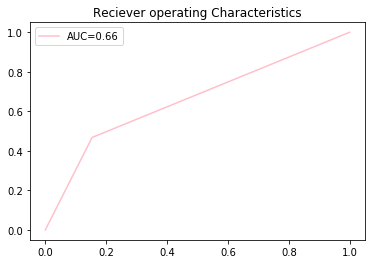

In [29]:
plt.title('Reciever operating Characteristics')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='pink')
plt.legend()
plt.plot

In [30]:
classifier.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1])

In [31]:
classifier.predict([[1,89,66,23,94,28.1,0.167,21]])

array([0])

In [32]:
classifier.predict([[3,126,88,41,235,9.3,0.704,27]])

array([0])

In [33]:
classifier.predict([[12,100,84,33,105,30.0,0.448,46]])

array([0])

In [34]:
!pip install watson-machine-learning-client --upgrade

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.0.365)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.21.0)
Requirement not upgraded as not directly required: tqdm in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (4.19.5)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.18.4)
Requirement not upgraded as not directly required: ibm-cos-sdk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.0.1)
Requirement not upgraded as not directly required: lomond in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.1.13)
Requirement not upgraded as not direct

In [35]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-05-22 06:46:51,255 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [36]:
wml_credentials={
  "access_key": "i0GTuKx8r0Enca5nDjBfiySlUGUsk2IMU49r47M8VtFI",
 "instance_id": "e5fa478a-5468-497e-af79-062f878f0ceb",
  "password": "904f3c56-d3e3-4adc-a3fc-680c520e547c",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "007e5c95-110b-4724-b95a-286f5d02a690"
}

In [37]:
client = WatsonMachineLearningAPIClient(wml_credentials)
import json


In [38]:
instance_details = client.service_instance.get_details()
print(json.dumps(instance_details, indent=2))


{
  "entity": {
    "region": "eu-gb",
    "published_models": {
      "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e5fa478a-5468-497e-af79-062f878f0ceb/published_models"
    },
    "status": "Active",
    "plan": "lite",
    "owner": {
      "email": "praneethamarthi@gmail.com",
      "beta_user": false,
      "ibm_id": "5500034QU9",
      "country_code": "IND",
      "user_id": "8b27546c-df64-4bbf-9794-679a72c28f0e"
    },
    "account": {
      "id": "528b8db158d4415ba0bf75aaa0fc82d0",
      "name": "Praneetha Marthi's Account",
      "type": "STANDARD"
    },
    "plan_id": "3f6acf43-ede8-413a-ac69-f8af3bb0cbfe",
    "usage": {
      "prediction_count": {
        "current": 3,
        "limit": 5000
      },
      "deployment_count": {
        "current": 0,
        "limit": 5
      },
      "gpu_count_v100": {
        "current": 0,
        "limit": 0
      },
      "computation_time": {
        "current": 0,
        "limit": 180000
      },
      "gpu_count_p100": {
     

In [39]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "HULKS", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "hulks@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Diabetic prediction"}

In [40]:
model_artifact =client.repository.store_model(classifier, meta_props=model_props)

In [41]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [42]:
published_model_uid

'e4e9366d-521d-47c8-9c1d-29e4cef9237d'

In [43]:
created_deployment = client.deployments.create(published_model_uid, name="DiabeticPrediction")




#######################################################################################

Synchronous deployment creation for uid: 'e4e9366d-521d-47c8-9c1d-29e4cef9237d' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e9304a32-fcd1-4217-bb85-3986bd72ae38'
------------------------------------------------------------------------------------------------




In [44]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e5fa478a-5468-497e-af79-062f878f0ceb/deployments/e9304a32-fcd1-4217-bb85-3986bd72ae38/online'

In [45]:
client.deployments.list()

------------------------------------  ------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
e9304a32-fcd1-4217-bb85-3986bd72ae38  DiabeticPrediction  online  DEPLOY_SUCCESS  2019-05-22T06:49:06.365Z  scikit-learn-0.19  model
1d0e27b6-9790-4972-93fe-91311d128b15  multilinear         online  DEPLOY_SUCCESS  2019-05-18T05:16:28.823Z  scikit-learn-0.19  model
------------------------------------  ------------------  ------  --------------  ------------------------  -----------------  -------------
